Task: Predicting Sina Weibo Interaction Behaviours

# Import

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('./data/weibo_train_data.txt', header=None, sep='\t')      # training
df2 = pd.read_table('./data/weibo_predict_data.txt', header=None, sep='\t')   # predicting

# Exploration

### Structure

In [3]:
df.columns = ['uid', 'mid', 'time', 'f', 'c', 'l', 'content']
df2.columns = ['uid', 'mid', 'time', 'content']
df.head()

,uid,mid,time,f,c,l,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,2015-03-31 13:58:06,0,0,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,2015-06-11 20:39:57,0,4,3,看点不能说的，你们都懂[笑cry]
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,2015-03-10 18:02:38,0,0,0,111多张


### Statistics

In [4]:
def describe(df, stats): # additional parameters
    d = df.describe()
    return d.append(df.reindex(d.columns, axis="columns").agg(stats))

describe(df, ['skew', 'mad', 'kurt']).round(3)

,f,c,l
count,1225088.000,1225088.000,1225088.000
mean,3.541,1.257,2.217
std,85.285,19.333,41.264
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,0.000,1.000
max,41850.000,7467.000,11871.000
skew,193.439,192.929,114.572
mad,6.229,2.030,3.591


### Missing values

In [5]:
df[['f', 'c', 'l']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225088 entries, 0 to 1225087
Data columns (total 3 columns):
f    1225088 non-null int64
c    1225088 non-null int64
l    1225088 non-null int64
dtypes: int64(3)
memory usage: 28.0 MB


### Duplications

Duplicated records:

In [6]:
len(df[df.duplicated()])

0

Duplicated users:

In [7]:
user_counts = df['uid'][df['uid'].duplicated()].value_counts()

In [8]:
pd.DataFrame(user_counts[:5])

,uid
875a4a77b339d93f819e2c4de5bd0b57,31014
0faddeeabf8b2cfd75afc6ad9c1ba2da,17159
7511e346911dd7d1e38f11485abb25c5,12012
c35d635cd9d875e63fcaff8e4f1398a9,7874
c60533fdb5278412b14379f693f77dd5,7800


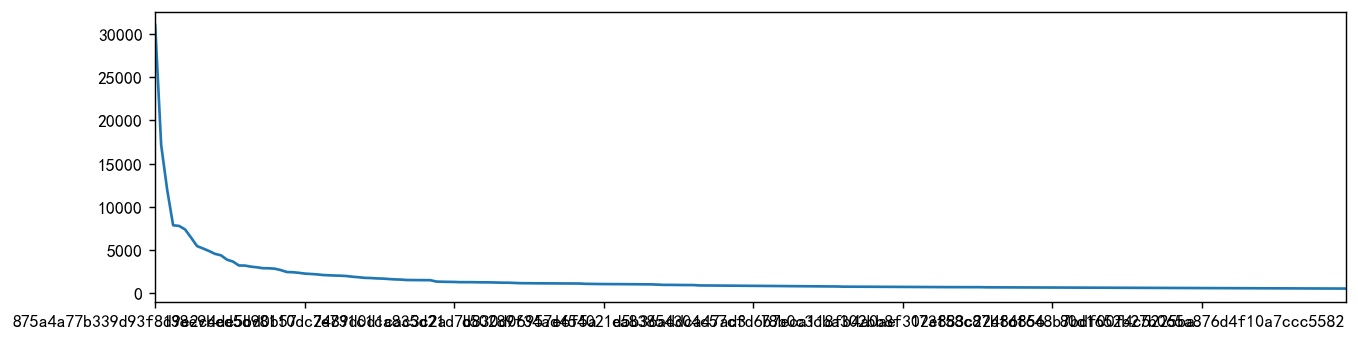

In [9]:

plt.figure(figsize=(12,3), dpi=128)
user_counts[:200].plot()# top 200

### Outliers

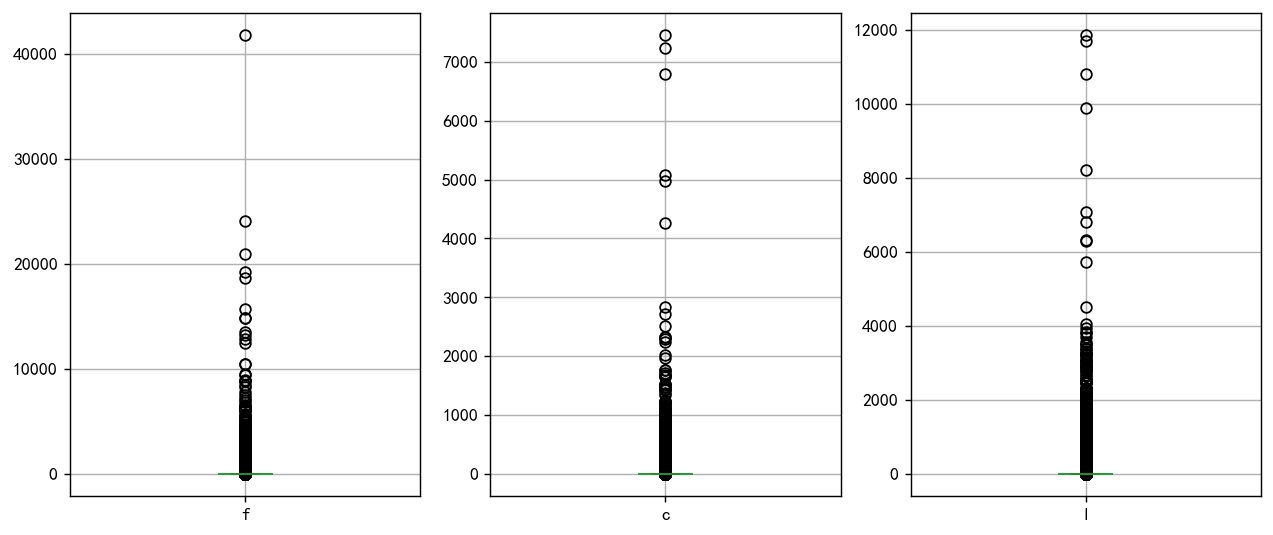

In [10]:

outlier = plt.figure(figsize=(12,5), dpi=128)

for i in range(1,4):
    outlier.add_subplot(1, 3, i)
    df[[['f', 'c', 'l'][i-1]]].boxplot()

### Correlation

In [11]:
import numpy as np
corr = df[['f', 'c', 'l']].corr()
high_corr = corr[np.abs(corr) > 0.5].fillna(0)
high_corr[np.abs(corr) > 0.5].fillna(0).round(3)

,f,c,l
f,1.000,0.579,0.554
c,0.579,1.000,0.617
l,0.554,0.617,1.000


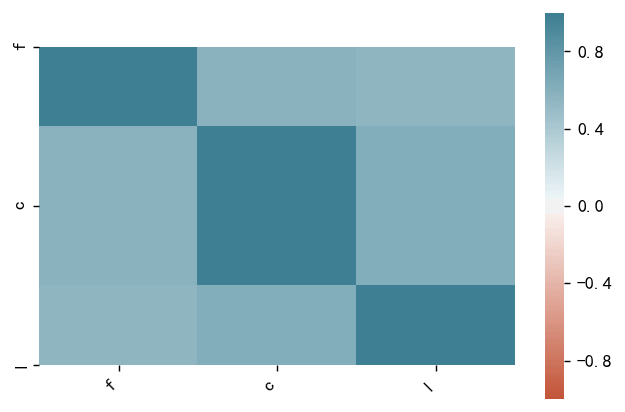

In [12]:
plt.figure(dpi=128)
ax = sns.heatmap(
    high_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Constants and features

### Constants

General constants are effective predicting values for some tweets.   

#### Mean

Use mean, generally.

In [13]:
f_mean = int(df.f.mean()) # only integers according to the task description
c_mean = int(df.c.mean())
l_mean = int(df.l.mean())
f_mean, c_mean, l_mean

(3, 1, 2)

#### Median

Use median, since high skewness

In [14]:
f_median = int(df.f.median()) # only integers according to the task description
c_median = int(df.c.median())
l_median = int(df.l.median())
f_median, c_median, l_median

(0, 0, 0)

##### TODO: Considering median for unique users since all medians are zero.

## Sorting

In [15]:
df  = df.sort_values( by=['uid', 'f'], ascending=False)
df2 = df2.sort_values(by=['uid'],      ascending=False)
df.head()

,uid,mid,time,f,c,l,content
78155,ffff5e493015a9240bd4d29de15ef55b,6f10a53787eeb7f79741f44620d0f058,2015-06-04 13:54:19,1,0,0,【滴滴专车】终于等到您，恭喜通过审核，正式成为专车司机！您的登陆账号：13718124000...
280520,ffff5e493015a9240bd4d29de15ef55b,8cb2af37fe818c3d8b58370c8ad94e1d,2015-02-08 01:04:25,1,9,0,静不下心看书了，咋办@刘曼_missL
404249,ffff5e493015a9240bd4d29de15ef55b,60d8206c24b8cb3a08f51b23d0f82cef,2015-06-21 17:24:46,1,4,0,798 http://t.cn/R2Wx6Sv
409066,ffff5e493015a9240bd4d29de15ef55b,8156e096c12e013bdc3a14fa0cdbe1a8,2015-02-07 08:03:23,1,3,1,12期，每期528元
550083,ffff5e493015a9240bd4d29de15ef55b,d583bb36db72d30d0ff71cacefbd3e13,2015-03-21 18:46:11,1,0,0,【张三丰为什么没有去找过郭襄？】木先生 : 和“志向、脱俗”无关。这事，终究不过一个“情”字...


In [16]:
users = pd.DataFrame(df2['uid'].unique()).isin(df['uid'].unique())
users.columns = ['in_train']
print(len(users[users['in_train'] == False]), "users from predicting data are not in the training data")

699 users from predicting data are not in the training data


## Features

-  3-rd party applications  
if "我在#" in content, then 1; else 0.

In [17]:
df['application'] = df.content.apply(lambda x: 1 if '我' in str(x) else 0) # str to convert string in numbers into strings
df[df['content'].str.contains("我在#") == 1].head(2)

,uid,mid,time,f,c,l,content,application
166917,fff7d9e6a58934f7f40f23b67c4196b8,94476fb5da5685da647125f5d8610549,2015-07-09 17:28:05,0,0,0,"我在#微盘#找到了一个超赞的文件""董方-2014GITC-网站云防护体系下的数据分析...""...",1
295734,fff092ad59869987f022e62337c5efe5,0af2ca96ca26e00d5b4fbe109e0f2ed3,2015-03-13 13:42:37,0,0,0,"我在#微盘#找到了一个超赞的文件""libmfcc-a99d34a62ba4.zip""，我已经...",1


-  title  
if content starts with "【", then 1; else 0.

In [18]:
df['title'] = df.content.apply(lambda x: 1 if str(x)[0] == '【' else 0) 

TODO: entertainment

-  ad related  
if any ad keywords in content then 1; else 0

In [19]:
ad_keywords = ['天猫', '淘宝', '购物券', '折扣', '优惠']
df['advertisement'] = df.content.apply(lambda x: 1 if any( keyword in str(x) for keyword in ad_keywords) else 0) # list generator
df[df['content'].str.contains('天猫') == 1].head(2)

,uid,mid,time,f,c,l,content,application,title,advertisement
44191,ffefb5e064e72ca10ab4372391c265ce,dc33f5adc1714b2903c42eb58cb4eadb,2015-03-09 15:51:10,5,1,0,"前两天moto有活动,正好打算给家里买个手机,觉得还是直接从官方(天猫)买保险.但是收到的手...",0,0,1
37149,ffefb5e064e72ca10ab4372391c265ce,2e57076dc8b248e2adcc66c71eba6ecc,2015-03-09 15:50:23,0,0,0,"前两天moto有活动,正好打算给家里买个手机,觉得还是直接从官方(天猫)买保险.但是收到的手...",0,0,1


-  hotwords  
if any baidu hotwords in content then 1; else 0

In [20]:
baidu_hot_words = ['2015阅兵', '奔跑吧兄弟', '花干骨', 'duang', 'DUANG', '毕福剑', '完美世界', '清华大学', '九寨沟', '天津爆炸', '快乐大本营', \
                   '校花的贴身高手', '车震', '金星', '大主宰', '武汉大学', '泰山', '全面开放二孩政策', 'running man','Running Man','Running man',\
                   'RUNNING MAN', '盗墓笔记', '萌萌哒', '王思聪', '淘宝', '厦门大学', '颐和园', '优衣库事件', '最强大脑', '何以笙箫默', '然并卵', \
                   '叶良辰', '百度', '北京大学', '故宫', '毕福剑违纪', '极限挑战', '斗鱼', '有钱就是任性', '昆凌', '我欲封天', '中山大学', '华山', \
                   'a股保卫战','A股保卫战', '欢乐喜剧人', '琅琊榜', '不做死就不会死', '刘雯', '双色球开奖结果', '中南大学', '北戴河', '人民币贬值', \
                   '天天向上', '克拉恋人', '小鲜肉', '章泽天', 'qq', 'QQ', '复旦大学', '普陀山', '2015苹果发布会', '中国好声音', '旋风少年', '绿茶婊', \
                   '马云', '微信', '山东大学', '五台山', '另一个地球可能发现', '康熙来了', '终极教师', '壕', '宁泽涛', '花千骨', '浙江大学', '峨眉山', \
                   '日本8.5级地震', '奇葩说', '武媚娘传奇', '我也是醉了', '柴静', '双色球', '西南大学', '云台山']
df['hotwords'] = df.content.apply(lambda x: 1 if any( keyword in str(x) for keyword in baidu_hot_words) else 0) # list generator
df[df['content'].str.contains('车震') == 1].head(2)

,uid,mid,time,f,c,l,content,application,title,advertisement,hotwords
784151,e4d7949da62db4e7304c8e8abc561595,12d7dad4d7498263c24b4109f1884838,2015-04-22 10:20:34,0,0,0,😭😱甩头车震一路狂嗨啊！电音帅炸了，妈妈问我为什么跪着听歌😳😳😳 分享单曲http://t....,1,0,0,1
424249,d5bc2b6e85cc880bf5e807f1c446540e,ec072ebd9dd0c2554a9844db2a4a3f33,2015-03-20 14:24:23,0,0,0,我tm笑了！！@深夜慎点 的美拍“深夜话题！你车震过吗？各种神回复，最后那位男生走好😂2]]...,1,0,0,1


-  keywords in high interactions
jieba 

In [52]:
threshold = 5
df[(df['f'] > threshold) & (df['c'] > threshold) & (df['l'] > threshold)].head(2)

,uid,mid,time,f,c,l,content,application,title,advertisement,hotwords
829674,fff67a9d6f8b2745a2cada662fc9c4a9,c382b1fd661f33fd5b0cb0c47119a015,2015-05-07 00:01:47,54,14,11,南京大学计算机系／软件新技术国家重点实验室“本科生开放日”开始报名了！面向全国高校计算机相关...,0,0,0,0
135785,ffefb5e064e72ca10ab4372391c265ce,95bf4bbd1dcfaab07d848b25c15abe56,2015-05-07 14:32:41,19,44,7,"大家好啊，目前我们贴吧移动团队，急需android,iOS,QA各级别工程师,我们这边有很强...",1,0,0,0


In [56]:
content = df[(df['f'] > threshold) & (df['c'] > threshold) & (df['l'] > threshold)]['content'].to_string( index = False, header = False)
content[0:100]

' 南京大学计算机系／软件新技术国家重点实验室“本科生开放日”开始报名了！面向全国高校计算机相关...\n 大家好啊，目前我们贴吧移动团队，急需android,iOS,QA各级别工程师,我们这边有很强..'

In [7]:
# import sys
# sys.path.append('../')

import jieba
import jieba.analyse

# jieba.analyse.set_stop_words('stoped.txt') # do not remove any meaningless words for 1st model 
keywords = jieba.analyse.extract_tags(content, topK=500)
print(",".join(keywords))

NameError: name 'content' is not defined

In [59]:
df['keywords'] = df.content.apply(lambda x: 1 if any( keyword in str(x) for keyword in keywords) else 0) # list generator
df[df['content'].str.contains('程序员') == 1].head(2)

,uid,mid,time,f,c,l,content,application,title,advertisement,hotwords,keywords
894876,ffff5e493015a9240bd4d29de15ef55b,03cb5be84a2fda1b27bf987b6033594e,2015-03-20 15:44:37,0,0,1,"我发现一个程序员网站 OutOfMemory.CN, 他的宗旨是“为程序员服务”，挺不错的，...",1,0,0,0,1
1187742,ffff39bf301adf32d06aae9dc70892fa,c9825f32b79b998f1e56068c8ae14c2d,2015-04-02 12:14:48,0,1,0,一直知道猿题库，一直知道@唐巧_boy ，一直以为猿题库是程序员的题目，一直以为@唐巧_bo...,0,0,0,0,1


-  TF-IDF  

In [4]:
def tfidf(content:str) -> float:
    """
    Find TF-IDF value of the most valuable word in a single tweet
    """
    keyword = jieba.analyse.extract_tags(content, topK=1, withWeight=True)
    if len(keyword) != 0:
        return keyword[0][1]
    else:
        return 0


In [5]:
df_tfidf = df
df_tfidf.head(2)

,uid,mid,time,f,c,l,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...


In [8]:
# too slow, only testing here
df_tfidf['tfidf'] = df_tfidf.content.apply(lambda x: tfidf(str(x)))
df_tfidf.to_csv("./output/df_tfidf.txt",
           header=False,
           sep="\t",
           index=False)
df_tfidf.head(2)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\oyrx\AppData\Local\Temp\jieba.cache
Loading model cost 0.669 seconds.
Prefix dict has been built succesfully.


,uid,mid,time,f,c,l,content,tfidf
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...,2.516793
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...,1.260857


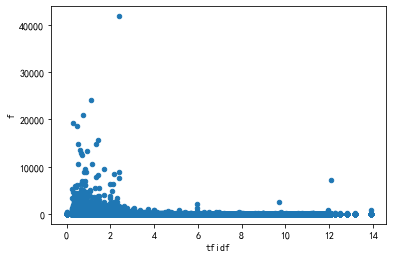

In [14]:
df_tfidf[['f','tfidf']].plot.scatter(x='tfidf', y='f')

In [19]:
df_tfidf[['uid', 'mid', 'time', 'f', 'c', 'l', 'tfidf', 'content']].to_csv("./output/df_tfidf.txt",
           header=True,
           sep="\t",
           index=False)

## Scores

In [ ]:
df_test = pd.DataFrame({
    'id':[1, 2, 3, 4, 5],
    'f':[333, 1, 0, 0, 1],
    'fp':[0, 0, 0, 0, 0],
    'c':[222, 3, 0, 1, 0],
    'cp':[0, 0, 0, 0, 0],
    'l':[250, 2, 1, 0, 0],
    'lp':[0, 0, 0, 0, 0],
})
df_test

In [ ]:
df_test['precision'] =  df_test.apply(lambda x: 1 - 0.5  * abs( x['fp'] - x['f'] ) / ( x['f'] + 5) \
                                                  - 0.25 * abs( x['cp'] - x['c'] ) / ( x['c'] + 3) \
                                                  - 0.25 * abs( x['lp']    - x['l'])    / ( x['l'] + 3)     , axis=1)
df_test

#### TODO: score function

In [ ]:
def score(df, times=2):
    df['precision'] =  df.apply(lambda x: 1 - 0.5  * abs( x['fp'] - x['f'] ) / ( x['f'] + 5) \
                                                  - 0.25 * abs( x['cp'] - x['c'] ) / ( x['c'] + 3) \
                                                  - 0.25 * abs( x['lp']    - x['l'])    / ( x['l'] + 3)     , axis=1)
    return 
score(df_test)

## Predict

- Predict with 0,0,0,  online accuracy: 22.94%

In [32]:
# dfp: a new pandas DF for predicting
dfp = df2[['uid', 'mid']]
dfp['fp,cp,lp'] = str("0,0,0")
dfp.to_csv("./output/result_000.txt", header = False, sep = "\t", index = False)

C:\Users\oyrx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Predict with 0,1,0, online accuracy: 23.26%

In [29]:
# dfp: a new pandas DF for predicting
dfp = df2[['uid', 'mid']]
dfp['fp,cp,lp'] = str("0,1,0")
dfp.to_csv("./output/result_010.txt", 
           header = False, 
           sep = "\t", 
           index = False)

C:\Users\oyrx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Predict with individual history median and fillna() with 0, online accuracy 29.38%

In [28]:
# dfp: a new pandas DF for predicting
dfp = df2[['uid', 'mid']]
m = df.groupby(['uid'])[['f', 'c', 'l']].median()
m = m.sort_values(by='f', ascending=False)
# dfp = pd.merge(dfp, m, how='left', on='uid')
dfp = pd.merge(dfp, m, how='left', on='uid').sort_values(by='f',
                                                         ascending=False)
dfp = dfp.fillna(0)
dfp = dfp.assign(
    predict=dfp.f.astype(int).astype(str) + ',' +
    dfp.c.astype(int).astype(str) + ',' +
    dfp.l.astype(int).astype(str))  # long but faster than apply lambda
dfp = dfp[['uid', 'mid', 'predict']]
dfp.head()
dfp.to_csv("./output/result_user_median.txt",
           header=False,
           sep="\t",
           index=False)


In [39]:
# dfp: a new pandas DF for predicting
dfp = df2[['uid', 'mid']]
m = df.groupby(['uid'])[['f', 'c', 'l']].median() * 1.33
m = m.sort_values(by='f', ascending=False)
# dfp = pd.merge(dfp, m, how='left', on='uid')
dfp = pd.merge(dfp, m, how='left', on='uid').sort_values(by='f',
                                                         ascending=False)
dfp = dfp.fillna(0)
dfp = dfp.assign(
    predict=dfp.f.astype(int).astype(str) + ',' +
    dfp.c.astype(int).astype(str) + ',' +
    dfp.l.astype(int).astype(str))  # long but faster than apply lambda
dfp = dfp[['uid', 'mid', 'predict']]
dfp.head()
dfp.to_csv("./output/result_user_median.txt",
           header=False,
           sep="\t",
           index=False)
